## Author: Anusha Ramachandran
### Purpose: =Social Media Analytics Project
### Topic: Elon Musk and Ukraine
### Date: 07th October, 2022

## <span style='background :yellow' > PART A: Keyword Selection and Data Collection </span>

#### 1. Keyword Selection

In [ ]:
from TwitterCollector import TwitterCollector
from datetime import datetime

In [22]:
# please fill in your bearer token here
bearer_token = r""

# initialize a TwitterCollector instance
tc = TwitterCollector(bearer_token = bearer_token)

In [23]:
query = 'Musk Ukraine -is:retweet lang:en'  # tweets containing 'Musk Ukraine', written in English, and excluding retweets

#### 2. Collect 10k tweets

In [4]:
recent_tweets = tc.fetch_recent_tweets(query = query  # specify the search query
                                        , tweets_cnt = 10000  # specify the number of tweets you want to collect
                                        , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                        , save_dir = 'sample_data'  # the file will be saved in this directory
                                        , file_name = 'Musk_10000.json'  # this will be the file name
                                        )

In [5]:
recent_tweets.keys()

dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])

In [2]:
import json
from pprint import pprint

with open('sample_data/Musk_10000.json') as infile:
    data = json.load(infile)

In [3]:
# How many tweets are there?
print('There are',len(data['tweets']),'tweets')

There are 10000 tweets


#### 3. List of unique author ids

In [398]:
import pandas as pd
df = pd.DataFrame.from_dict(data)
df['Author Id'] = df['tweets'].apply(lambda x: x['author_id'] if type(x) is dict else np.nan)

#list of unique author ids
list_author_ids = df['Author Id'].unique()
print(list_author_ids)

#count of unique
df['Author Id'].nunique()

['5988062' '4845174218' '1411885732952784900' ... '273109557' '324559459'
 '144274618']


8110

#### 4. Fetch Author information

In [400]:
import tweepy
import time
from datetime import datetime

dict_author_info = {}

list_author_ids2 = list_author_ids

for i, author_id in enumerate(list_author_ids2):
    try:
        dict_author_info[author_id] = tc.fetch_author_info(str(author_id))
        if i % 1000 == 0:
            print("Have processed " + str(i))
    except tweepy.TooManyRequests:
        time.sleep(15*60)
    except AttributeError:
        continue

Have processed 0


In [401]:
# save author_info as a json file
import json
json_str = json.dumps(dict_author_info, indent = 4)
with open('authorinfo.json','w') as json_file:
    json_file.write(json_str)

In [402]:
# load the json file
with open('authorinfo.json') as json_file:
    author_information = json.load(json_file)
len(author_information)

497

In [ ]:
len(list_author_ids)

## <span style='background :yellow' > PART B: Preliminary Analysis </span>

#### 1. 10 most popular words with stop words

In [281]:
from collections import Counter

words_musk = []

for tweet in data['tweets']:
    txt = tweet['text']
    words_musk.extend(txt.split())

c=Counter(words_musk)
print('the 10 most popular words are '+ str(c.most_common(10)))

the 10 most popular words are [('to', 8315), ('the', 7643), ('Musk', 6884), ('Ukraine', 6290), ('Elon', 5486), ('of', 4704), ('and', 4516), ('a', 4496), ('is', 4338), ('in', 3600)]


#### 10 most popular words without stop words

In [282]:
import pickle
with open('stopwords.pkl', 'rb') as f: 
    stopwords = pickle.load(f)

for i in ['https','Ukraine.','The','t','co','https.+','https*']:
    stopwords.append(i)

words_musk2 = [] # our accumulator list
    
for w in words_musk:
    if w not in stopwords and len(w) > 1:
        words_musk2.append(w)

wanted = 'https'
words_musk2 = [word for word in words_musk2 if not word.startswith(wanted)]
          
Counter(words_musk2)

c2=Counter(words_musk2)
print('the 10 most popular words excluding stop words '+ str(c2.most_common(10)))

the 10 most popular words excluding stop words [('Musk', 6884), ('Ukraine', 6290), ('Elon', 5486), ('@elonmusk', 1923), ('Russia', 1497), ('Twitter', 1285), ('war', 1148), ('peace', 989), ("Musk's", 866), ('Russian', 825)]


In [283]:
c2

Counter({'Elon': 5486,
         'Musk’s': 449,
         'foray': 6,
         'geopolitics': 12,
         'Ukraine': 6290,
         'worried': 23,
         '@arnocast': 9,
         'My': 47,
         'guess': 35,
         'Musk': 6884,
         'wants': 329,
         'conflict': 89,
         'stop': 228,
         'affecting': 1,
         'bottom': 8,
         'line.': 6,
         'His': 181,
         'benefactor,': 1,
         'US': 494,
         'Military,': 1,
         'focused': 6,
         'rather': 37,
         'pet': 1,
         'projects.': 1,
         'This': 270,
         'war': 1148,
         'using': 48,
         'lot': 84,
         "Military's": 1,
         'discretionary': 1,
         'funds,': 1,
         'imo.': 1,
         'Lindsay': 17,
         'Graham': 532,
         'Cracker': 4,
         'shut': 69,
         'up!': 3,
         'Even': 48,
         'Lindsey': 461,
         'agrees': 20,
         'pro-Putin': 8,
         'propagandist.': 4,
         '#ElonMusk': 126,


#### 2. 10 most popular hashtags

In [61]:
hashtag_musk = []

for w in words_musk:
    if "#" in w:
        hashtag_musk.append(w)
        
chash=Counter(hashtag_musk)
print('the 10 most popular hashtags are '+ str(chash.most_common(10)))

the 10 most popular hashtags are [('#Ukraine', 331), ('#ElonMusk', 126), ('#Russia', 115), ('#Musk', 111), ('#news', 70), ('#ukraine', 58), ('#USA', 52), ('#Twitter', 51), ('#UkraineRussiaWar', 38), ('#Putin', 36)]


#### 3. 10 most frequently mentioned usernames

In [ ]:
usernames_musk = []

for w in words_musk:
    if "@" in w:
        usernames_musk.append(w)
        
chash=Counter(usernames_musk)
print('the 10 most popular hashtags are '+ str(chash.most_common(10)))

#### 4. Three most common sources of the tweets

In [71]:
source_tweet_musk = []

for i in range(0,len(data['tweets'])):
    source_tweet_musk.append(data['tweets'][i]['source'])
        
csource=Counter(source_tweet_musk)
print('the 3 most common sources of the tweets are '+ str(csource.most_common(3)))

the 3 most common sources of the tweets are [('Twitter Web App', 3905), ('Twitter for iPhone', 2161), ('Twitter for Android', 1999)]


#### 5. Time trend of tweet counts

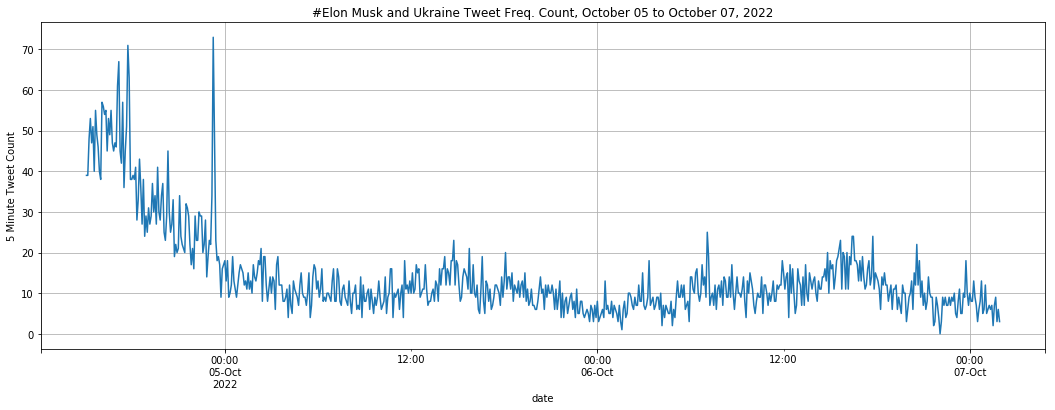

In [284]:
#Citation- Code leveraged from: https://cvw.cac.cornell.edu/PyDataSci1/tweets_retweets

import matplotlib.pyplot as plt

new_df = pd.DataFrame(df.tweets.tolist())

new_df['date'] = pd.to_datetime(new_df['created_at'])

tweet_df_5min = new_df.groupby(pd.Grouper(key='date', freq='5Min', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('5 Minute Tweet Count')
plt.title('#Elon Musk and Ukraine Tweet Freq. Count, October 05 to October 07, 2022')
plt.grid(True)

#### 6. Three most influential tweets

In [135]:
public_metrics_df = pd.DataFrame(new_df.public_metrics.tolist())
df_metrics = pd.concat([new_df.reset_index(drop=True),public_metrics_df.reset_index(drop=True)], axis=1)

In [333]:
cols = ['quote_count', 'reply_count', 'retweet_count', 'like_count']
df_metrics["tweet's influence"] = df_metrics[cols].sum(axis=1)
df_influential = df_metrics.sort_values("tweet's influence",ascending=False).head(3)
print(df_influential['text'])

7599    Ukraine turning on Elon Musk for promoting pea...
3836    With all due respect to Elon Musk - and I do r...
5779    Zelensky attacked Elon Musk for proposing a pe...
Name: text, dtype: object


#### 7. Three most vocal authors

In [220]:
vocal_authors = df_metrics['author_id'].value_counts(ascending = False).head(3)
df_vocal_authors = vocal_authors.to_frame()
list_vocal = list(df_vocal_authors.index)
list_vocal

for i in range(0,len(list_vocal)):
    author_id = list_vocal[i]
    print(tc.fetch_author_info(author_id)['name'])

InspiredGH
Andrzej Grochowski
MaynardCrebbs


#### 8. Three most influential authors

In [417]:
influence_authors = []

for k in dict_author_info:
    public_metrics = dict_author_info[k]['public_metrics']
    influence_score = public_metrics['followers_count'] + public_metrics['following_count'] + public_metrics['tweet_count'] + public_metrics['listed_count']
    influence_authors.append(influence_score)

most_influential_authors = []    
most_influential_authors = heapq.nlargest(3, range(len(influence_authors)), key=influence_authors.__getitem__)

for i in range(len(most_influential_authors)):
    index = most_influential_authors[i]
    print(list(dict_author_info.values())[index]['name'])
    

The Economist
Forbes
Jonathan Knight


## <span style='background :yellow' > PART C: Word Cloud </span>

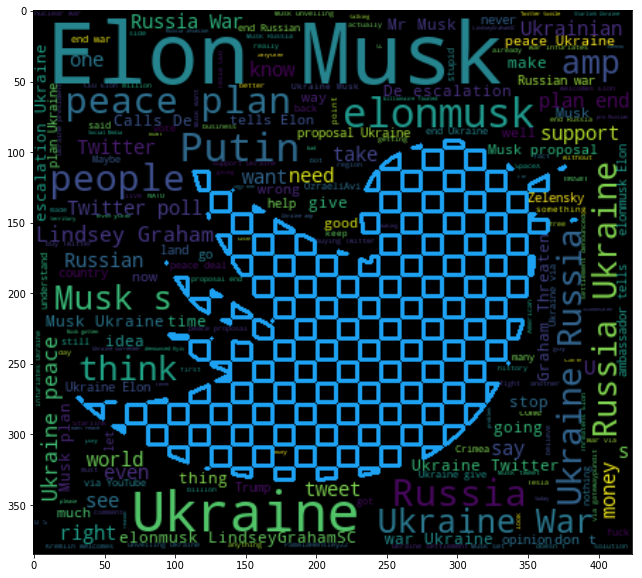

<Figure size 432x288 with 0 Axes>

In [424]:
#Make a word cloud visualization (without stop words)
#Citation- Code leveraged from: "https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/" and
# https://usbrandcolors.com/twitter-colors/ and https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import numpy as np
from PIL import Image

%matplotlib inline

mask = np.array(Image.open('logo.png'))

text = ' '.join(words_musk2)
wordcloud = WordCloud(mask=mask,width=mask.shape[1],height=mask.shape[0],background_color='black',contour_width=3,contour_color='#1DA1F2').generate(text) # note that text is a string, not a list

# Display the generated image:
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud,interpolation="bilinear") # word cloud image show
plt.axis("on") # turn on axis
plt.show()  # show in Jupyter notebook
plt.savefig('WordCloud_Elon.png')

## <span style='background :yellow' > PART D: Sentiment Analysis </span>

In [306]:
from textblob import TextBlob

In [307]:
content = ' '.join(words_musk2)
tb = TextBlob(content)
sentences = tb.sentences

In [308]:
sub_list = []
pol_list = []

for s in sentences:
    tb = TextBlob(str(s))
    sub_list.append(tb.sentiment.subjectivity)
    pol_list.append(tb.sentiment.polarity)

#### 1. Average polarity and subjectivity scores

In [380]:
from statistics import mean

print(mean(pol_list))
print(mean(sub_list))

0.02541394254708423
0.28117206012995594


#### 2. Visualize polarity and subjectivity scores

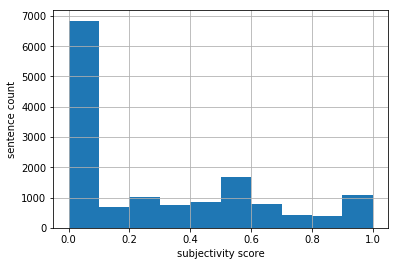

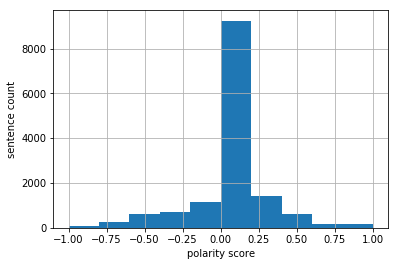

In [381]:
plt.hist(sub_list, bins=10) #, normed=1, alpha=0.75)

plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('subjectivity.pdf')
plt.show()

plt.hist(pol_list, bins=10) #, normed=1, alpha=0.75)

plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('polarity.pdf')
plt.show()

#### 3. Most positive and negative tweets

In [326]:
#Citation- Code leveraged from: https://www.adamsmith.haus/python/answers/how-to-find-the-index-of-the-max-value-in-a-list-in-python
#and
#https://stackoverflow.com/questions/23473723/how-to-find-the-positions-of-the-n-biggest-values-of-a-list-in-python

#most positive tweets
import heapq
positive_index = []
positive_index = heapq.nlargest(3, range(len(pol_list)), key=pol_list.__getitem__)

for i in range(0,len(positive_index)):
    index = positive_index[i]
    print('Positive Tweet ',i+1,' :', sentences[index])

#most negative tweets:
negative_index = []
positive_index = heapq.nsmallest(3, range(len(pol_list)), key=pol_list.__getitem__)

for i in range(0,len(positive_index)):
    index = positive_index[i]
    print('Negative Tweet ',i+1,' :', sentences[index])



Positive Tweet  1  : Sen. Graham Warns Elon Musk After He Calls De-escalation Ukraine War Best Musk stays Ukraine's business!
Positive Tweet  2  : Ukraine Balts anti-war best knowledge achieve that.
Positive Tweet  3  : Compromise best hope.
Negative Tweet  1  : War horrible.
Negative Tweet  2  : Nasty threat snake.
Negative Tweet  3  : Ukraine knows people vote favor Russia, EU US, voices must silenced, anything say framed 'fear Russia' @ZaleskiLuke Elon Musk awful point here.


## Thank You!